In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open("names.txt","r").read().splitlines()
words[:7]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [6]:
# building dataset

X,Y=[],[]
block_size = 3
for w in words[:5]:
    print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context),'------>',itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)    

emma
... ------> e
..e ------> m
.em ------> m
emm ------> a
mma ------> .
olivia
... ------> o
..o ------> l
.ol ------> i
oli ------> v
liv ------> i
ivi ------> a
via ------> .
ava
... ------> a
..a ------> v
.av ------> a
ava ------> .
isabella
... ------> i
..i ------> s
.is ------> a
isa ------> b
sab ------> e
abe ------> l
bel ------> l
ell ------> a
lla ------> .
sophia
... ------> s
..s ------> o
.so ------> p
sop ------> h
oph ------> i
phi ------> a
hia ------> .


In [7]:
print(f"{X.shape=}, {X.dtype=} | {Y.shape=}, {Y.dtype=}")

X.shape=torch.Size([32, 3]), X.dtype=torch.int64 | Y.shape=torch.Size([32]), Y.dtype=torch.int64


In [8]:
C = torch.randn((27,2))

In [9]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [10]:
print(f'{emb[13] = },\n{emb[10] = }')

emb[13] = tensor([[1.2847, 2.1893],
        [1.2847, 2.1893],
        [1.3823, 1.0283]]),
emb[10] = tensor([[ 3.3049,  1.3123],
        [-0.1974, -0.3175],
        [ 3.3049,  1.3123]])


In [11]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [12]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [13]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1) # very inefficient

tensor([[ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  0.3005, -1.0464],
        [ 1.2847,  2.1893,  0.3005, -1.0464,  2.1884, -0.8598],
        [ 0.3005, -1.0464,  2.1884, -0.8598,  2.1884, -0.8598],
        [ 2.1884, -0.8598,  2.1884, -0.8598,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  0.0504,  0.2802],
        [ 1.2847,  2.1893,  0.0504,  0.2802,  1.0239, -0.7796],
        [ 0.0504,  0.2802,  1.0239, -0.7796,  3.3049,  1.3123],
        [ 1.0239, -0.7796,  3.3049,  1.3123, -0.1974, -0.3175],
        [ 3.3049,  1.3123, -0.1974, -0.3175,  3.3049,  1.3123],
        [-0.1974, -0.3175,  3.3049,  1.3123,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.3823,  1.0283, -0.1974, -0.3175],
        [ 1.3823,  1.0283, -0.1974, -0.3

In [14]:
torch.cat(torch.unbind(emb,1),1)

tensor([[ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  0.3005, -1.0464],
        [ 1.2847,  2.1893,  0.3005, -1.0464,  2.1884, -0.8598],
        [ 0.3005, -1.0464,  2.1884, -0.8598,  2.1884, -0.8598],
        [ 2.1884, -0.8598,  2.1884, -0.8598,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  0.0504,  0.2802],
        [ 1.2847,  2.1893,  0.0504,  0.2802,  1.0239, -0.7796],
        [ 0.0504,  0.2802,  1.0239, -0.7796,  3.3049,  1.3123],
        [ 1.0239, -0.7796,  3.3049,  1.3123, -0.1974, -0.3175],
        [ 3.3049,  1.3123, -0.1974, -0.3175,  3.3049,  1.3123],
        [-0.1974, -0.3175,  3.3049,  1.3123,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.3823,  1.0283, -0.1974, -0.3175],
        [ 1.3823,  1.0283, -0.1974, -0.3

In [15]:
torch.cat(torch.unbind(emb,2),1)

tensor([[ 1.2847,  1.2847,  1.2847,  2.1893,  2.1893,  2.1893],
        [ 1.2847,  1.2847,  0.3005,  2.1893,  2.1893, -1.0464],
        [ 1.2847,  0.3005,  2.1884,  2.1893, -1.0464, -0.8598],
        [ 0.3005,  2.1884,  2.1884, -1.0464, -0.8598, -0.8598],
        [ 2.1884,  2.1884,  1.3823, -0.8598, -0.8598,  1.0283],
        [ 1.2847,  1.2847,  1.2847,  2.1893,  2.1893,  2.1893],
        [ 1.2847,  1.2847,  0.0504,  2.1893,  2.1893,  0.2802],
        [ 1.2847,  0.0504,  1.0239,  2.1893,  0.2802, -0.7796],
        [ 0.0504,  1.0239,  3.3049,  0.2802, -0.7796,  1.3123],
        [ 1.0239,  3.3049, -0.1974, -0.7796,  1.3123, -0.3175],
        [ 3.3049, -0.1974,  3.3049,  1.3123, -0.3175,  1.3123],
        [-0.1974,  3.3049,  1.3823, -0.3175,  1.3123,  1.0283],
        [ 1.2847,  1.2847,  1.2847,  2.1893,  2.1893,  2.1893],
        [ 1.2847,  1.2847,  1.3823,  2.1893,  2.1893,  1.0283],
        [ 1.2847,  1.3823, -0.1974,  2.1893,  1.0283, -0.3175],
        [ 1.3823, -0.1974,  1.3823,  1.0

In [16]:
emb.view(32,6) # very efficient

tensor([[ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  0.3005, -1.0464],
        [ 1.2847,  2.1893,  0.3005, -1.0464,  2.1884, -0.8598],
        [ 0.3005, -1.0464,  2.1884, -0.8598,  2.1884, -0.8598],
        [ 2.1884, -0.8598,  2.1884, -0.8598,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  0.0504,  0.2802],
        [ 1.2847,  2.1893,  0.0504,  0.2802,  1.0239, -0.7796],
        [ 0.0504,  0.2802,  1.0239, -0.7796,  3.3049,  1.3123],
        [ 1.0239, -0.7796,  3.3049,  1.3123, -0.1974, -0.3175],
        [ 3.3049,  1.3123, -0.1974, -0.3175,  3.3049,  1.3123],
        [-0.1974, -0.3175,  3.3049,  1.3123,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.2847,  2.1893],
        [ 1.2847,  2.1893,  1.2847,  2.1893,  1.3823,  1.0283],
        [ 1.2847,  2.1893,  1.3823,  1.0283, -0.1974, -0.3175],
        [ 1.3823,  1.0283, -0.1974, -0.3

In [17]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [18]:
h.shape

torch.Size([32, 100])

In [19]:
# check for broad casting
# 32 x 100 (emb @ W1)
#      100 (b1)

In [20]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [21]:
logits = h @ W2 + b2

In [22]:
count = logits.exp()

In [23]:
count.shape

torch.Size([32, 27])

In [24]:
prob = count / count.sum(1,keepdim=True)

In [25]:
prob.shape

torch.Size([32, 27])

In [26]:
prob[0].sum()

tensor(1.0000)

In [27]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.9585)

In [28]:
#------------------------ full code ------------------------

In [29]:
# dataset

X,Y=[],[]
block_size = 3
for w in words:
    # print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context),'------>',itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)   

In [30]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [31]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [32]:
sum( p.nelement()  for p in parameters)

11897

In [33]:
for p in parameters:
    p.requires_grad = True

In [34]:
# learning rates
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [35]:
lri = []
lossi = []
stepi = []

In [36]:
for i in range(100000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (1000,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  # lr = lrs[i]
  lr = 0.1 if i < 50000 else 0.01
  # lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.107623338699341


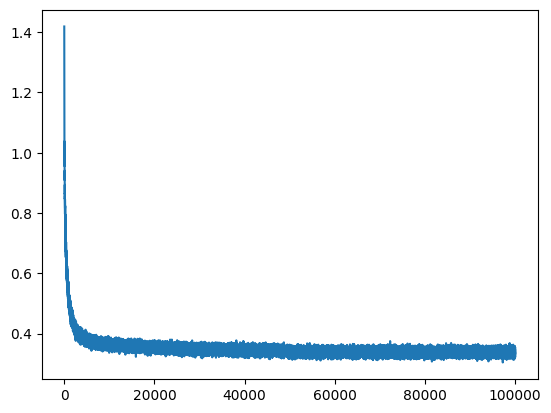

In [37]:
plt.plot(stepi,lossi)

In [38]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1790, grad_fn=<NllLossBackward0>)

In [39]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1978, grad_fn=<NllLossBackward0>)

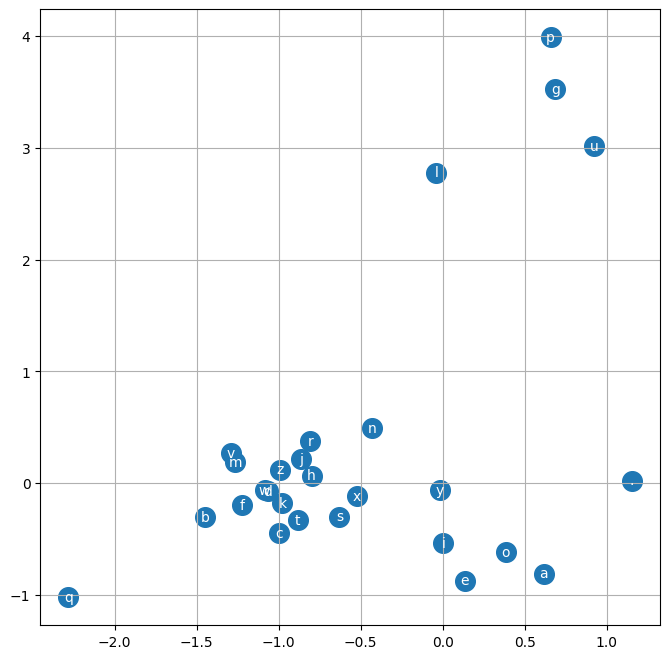

In [298]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [40]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
kayah.
see.
mel.
ryah.
revyrn.
endrlee.
adelynneliigh.
porelle.
elieananaraelyzios.
karin.
shdenrishiriel.
kinde.
jelipanthuca.
uburted.
ryyah.
faeha.
kaysh.
samyah.
hal.
